Rectangle Likelihood: 79.58333333333327%


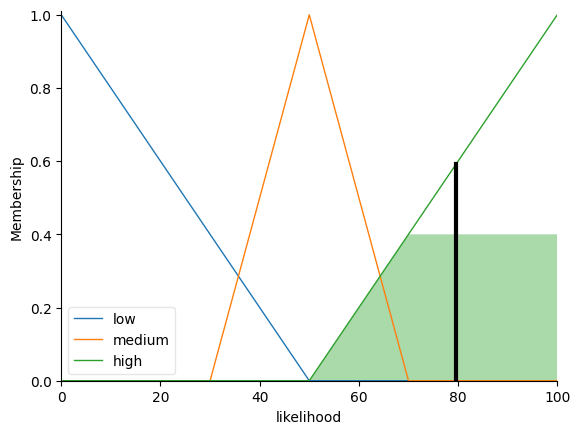

In [2]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
aspect_ratio = np.arange(0, 5, 0.1)  # Aspect ratio from 0 to 5
edge_sharpness = np.arange(0, 11, 1)  # Edge sharpness from 0 to 10
likelihood = np.arange(0, 101, 1)  # Likelihood from 0% to 100%

# Define the fuzzy membership functions for aspect ratio
ratio_low = fuzz.trimf(aspect_ratio, [0, 0, 1.5])
ratio_med = fuzz.trimf(aspect_ratio, [1, 2, 3])
ratio_high = fuzz.trimf(aspect_ratio, [2.5, 5, 5])

# Define the fuzzy membership functions for edge sharpness
sharpness_low = fuzz.trimf(edge_sharpness, [0, 0, 5])
sharpness_med = fuzz.trimf(edge_sharpness, [3, 5, 7])
sharpness_high = fuzz.trimf(edge_sharpness, [5, 10, 10])

# Define the fuzzy membership functions for rectangle likelihood
likelihood_low = fuzz.trimf(likelihood, [0, 0, 50])
likelihood_med = fuzz.trimf(likelihood, [30, 50, 70])
likelihood_high = fuzz.trimf(likelihood, [50, 100, 100])

# Create the fuzzy variables
ratio = ctrl.Antecedent(aspect_ratio, 'aspect_ratio')
sharpness = ctrl.Antecedent(edge_sharpness, 'edge_sharpness')
rect_likelihood = ctrl.Consequent(likelihood, 'likelihood')

# Assign the membership functions to fuzzy variables
ratio['low'] = ratio_low
ratio['medium'] = ratio_med
ratio['high'] = ratio_high

sharpness['low'] = sharpness_low
sharpness['medium'] = sharpness_med
sharpness['high'] = sharpness_high

rect_likelihood['low'] = likelihood_low
rect_likelihood['medium'] = likelihood_med
rect_likelihood['high'] = likelihood_high

# Define the fuzzy rules
rule1 = ctrl.Rule(ratio['low'] & sharpness['low'], rect_likelihood['low'])
rule2 = ctrl.Rule(ratio['low'] & sharpness['medium'], rect_likelihood['low'])
rule3 = ctrl.Rule(ratio['low'] & sharpness['high'], rect_likelihood['medium'])
rule4 = ctrl.Rule(ratio['medium'] & sharpness['low'], rect_likelihood['low'])
rule5 = ctrl.Rule(ratio['medium'] & sharpness['medium'], rect_likelihood['high'])
rule6 = ctrl.Rule(ratio['medium'] & sharpness['high'], rect_likelihood['high'])
rule7 = ctrl.Rule(ratio['high'] & sharpness['low'], rect_likelihood['low'])
rule8 = ctrl.Rule(ratio['high'] & sharpness['medium'], rect_likelihood['medium'])
rule9 = ctrl.Rule(ratio['high'] & sharpness['high'], rect_likelihood['high'])

# Create the control system
rectangle_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
rectangle_sim = ctrl.ControlSystemSimulation(rectangle_control)

# Simulate the control system with specific inputs
rectangle_sim.input['aspect_ratio'] = 1.8  # Example aspect ratio
rectangle_sim.input['edge_sharpness'] = 7  # Example edge sharpness

# Compute the result
rectangle_sim.compute()

# Print the result
print(f"Rectangle Likelihood: {rectangle_sim.output['likelihood']}%")

# Visualize the result
rect_likelihood.view(sim=rectangle_sim)